# Practicing Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np

In [30]:
# visualization related imports and configurations: Seaborn, matplotlib, seaborn themes
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=2)

## Case Study: Planes in WW2

You have been given a dataset and tasked with trying to solve a problem. In WW2, **expensive fighter planes were going down quite frequently due to bullet fire**. The military decided to conduct an analysis and surveyed all the surviving planes in an effort to catalogue which regions of the plane should be reinforced. 

With limited resources, the military could only reinforce a maximum of two zones. Your task is to look at the bullet data for the planes and help determine which areas of the plane should be reinforced.

You're given a schematic of the plane, and told that the workers added a grid to the schematic, divided it up into regions A,B,C,D,E and recorded a value of 1 wherever there was a bullet hole across all the planes that returned. Areas without bullet holes are marked as 0. 

They gave you a csv file with this information called `bullet_data.csv`. Yes, these WW2 workers are very sophisticated and had access to a computer :-).

<img src="images/plane.png" width=250>

## Load Data

In [3]:
df = pd.read_csv("https://github.com/firasm/bits/raw/master/bullet_data.csv")
df.head()

,x,y,bullet,zone
0,0,0,0.0,OutsidePlane
1,0,1,0.0,OutsidePlane
2,0,2,0.0,OutsidePlane
3,0,3,0.0,OutsidePlane
4,0,4,0.0,OutsidePlane


In [5]:
df["x"].max(), df["y"].max()

(249, 349)

In [6]:
df["x"].min(), df["y"].min()

(0, 0)

In [7]:
df["bullet"].unique()

array([ 0., nan,  1.])

In [8]:
df.describe()

,x,y,bullet
count,87500.000000,87500.000000,68526.000000
mean,124.500000,174.500000,0.008741
std,72.168619,101.036462,0.093086
min,0.000000,0.000000,0.000000
25%,62.000000,87.000000,0.000000
50%,124.500000,174.500000,0.000000
75%,187.000000,262.000000,0.000000
max,249.000000,349.000000,1.000000


In [14]:
sorted(df["zone"].unique().tolist())

['A', 'B', 'C', 'D', 'E', 'OutsidePlane', 'Unknown']

### Imagining the final dataframe

| Zone | Sum of total bullet hits |
| ---- | ------------------------ |
| A | | 
| B | |
| C | |
| D | |
| E | |
| Outside Plane | |
| NA | |

In [19]:
df[df["bullet"] == 1]

,x,y,bullet,zone
24303,69,153,1.0,B
24308,69,158,1.0,B
24341,69,191,1.0,B
24629,70,129,1.0,B
24636,70,136,1.0,B
...,...,...,...,...
83874,239,224,1.0,E
84149,240,149,1.0,E
84487,241,137,1.0,Unknown
84518,241,168,1.0,Unknown


In [22]:
hits_df = df[df["bullet"] == 1]
hits_df

,x,y,bullet,zone
24303,69,153,1.0,B
24308,69,158,1.0,B
24341,69,191,1.0,B
24629,70,129,1.0,B
24636,70,136,1.0,B
...,...,...,...,...
83874,239,224,1.0,E
84149,240,149,1.0,E
84487,241,137,1.0,Unknown
84518,241,168,1.0,Unknown


In [26]:
hits_df_gb = hits_df.groupby("zone").sum().reset_index()
hits_df_gb

,zone,x,y,bullet
0,A,7627,4638,83.0
1,B,24501,44167,259.0
2,C,7533,24025,83.0
3,D,6613,8223,47.0
4,E,25247,19938,111.0
5,Unknown,2520,2586,16.0


In [27]:
hits_df_gb["bullet"].sum()

599.0

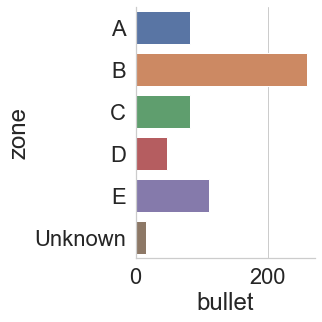

In [32]:
sns.catplot(data=hits_df_gb, y="zone", x="bullet", kind="bar")

In [33]:
sns.heatmap(data=df, x="x", y="y")

ValueError: could not convert string to float: 'OutsidePlane'

In [40]:
df_heatmap = df.pivot(index="x", columns="y", values="bullet")
df_heatmap

y,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
x,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


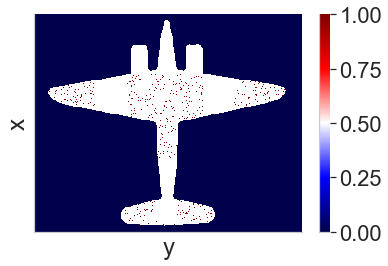

In [48]:
sns.heatmap(data=df_heatmap, cmap="seismic")
plt.xticks([])
plt.yticks([])
sns.despine()